In [1]:
import os 
import sys 

from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import torch  
import minari 
import numpy as np

from utils.sampling_states import sample_states
from models.cl_model import mlpCL


In [2]:
MINARI_DATASET = minari.load_dataset("D4RL/pointmaze/large-v2")
DEVICE = "cpu"
PROJECT_ROOT = os.getcwd()

In [3]:
# Get states from dataset
states = sample_states(MINARI_DATASET, 1_000_000)

In [4]:
# Subsample from the states array so there isn't so much clutter on visualization
idx = np.random.choice(np.arange(1_000_000), size=50_000, replace=False)
new_states = states[idx]

In [5]:
# Get all 4 models 

model_name_1 = "best_model_laplacian.ckpt"
pretrained_model_file = os.path.join(PROJECT_ROOT+ "/best_models", model_name_1) 

if os.path.isfile(pretrained_model_file): 
    print(f"Found pretrained model at {pretrained_model_file}, loading...") 
    laplace_model = mlpCL.load_from_checkpoint(pretrained_model_file, map_location=torch.device(DEVICE))


model_name_2 = "best_model_gaussian_15.ckpt"
pretrained_model_file = os.path.join(PROJECT_ROOT+ "/best_models", model_name_2) 

if os.path.isfile(pretrained_model_file): 
    print(f"Found pretrained model at {pretrained_model_file}, loading...") 
    gauss_model = mlpCL.load_from_checkpoint(pretrained_model_file, map_location=torch.device(DEVICE))


model_name_3 = "best_model_exponential.ckpt"
pretrained_model_file = os.path.join(PROJECT_ROOT+ "/best_models", model_name_3) 

if os.path.isfile(pretrained_model_file): 
    print(f"Found pretrained model at {pretrained_model_file}, loading...") 
    expo_model = mlpCL.load_from_checkpoint(pretrained_model_file, map_location=torch.device(DEVICE))


model_name_4 = "best_model_uniform.ckpt"
pretrained_model_file = os.path.join(PROJECT_ROOT+ "/best_models", model_name_4) 

if os.path.isfile(pretrained_model_file): 
    print(f"Found pretrained model at {pretrained_model_file}, loading...") 
    uniform_model = mlpCL.load_from_checkpoint(pretrained_model_file, map_location=torch.device(DEVICE))


Found pretrained model at c:\Users\ray\Documents\2025 RA\contrastive-learning-RL/best_models\best_model_laplacian.ckpt, loading...
Found pretrained model at c:\Users\ray\Documents\2025 RA\contrastive-learning-RL/best_models\best_model_gaussian_15.ckpt, loading...
Found pretrained model at c:\Users\ray\Documents\2025 RA\contrastive-learning-RL/best_models\best_model_exponential.ckpt, loading...
Found pretrained model at c:\Users\ray\Documents\2025 RA\contrastive-learning-RL/best_models\best_model_uniform.ckpt, loading...


In [6]:
# Convert subsampled states to latent represntation 
new_states = torch.as_tensor(new_states, dtype=torch.float32)

with torch.no_grad():
    laplace_z = laplace_model(new_states)
    gauss_z = gauss_model(new_states)
    expo_z = expo_model(new_states) 
    uniform_z = uniform_model(new_states)

In [7]:
pca = PCA(n_components=2)

pca_laplace = pca.fit_transform(laplace_z)
pca_gauss = pca.fit_transform(gauss_z)
pca_expo = pca.fit_transform(expo_z)
pca_uniform = pca.fit_transform(uniform_z)


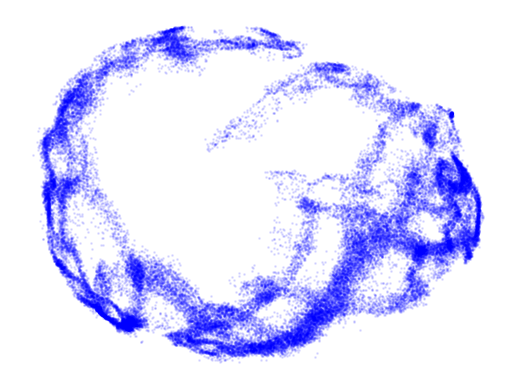

In [10]:
plt.axis("off")
plt.scatter(pca_laplace[:, 0], pca_laplace[:, 1], s=1, c="blue", alpha=0.1)
#plt.scatter(pca_gauss[:, 0], pca_gauss[:, 1], s=1, c="red", alpha=0.1)
#plt.scatter(pca_expo[:, 0], pca_expo[:, 1], s=1, c="green", alpha=0.1)
#plt.scatter(pca_uniform[:, 0], pca_uniform[:, 1], s=1, c="purple", alpha=0.1)

